<a href="https://colab.research.google.com/github/litvinova08/tip2024/blob/main/15_09_NB_and_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [463]:
# importing required libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import pickle
from os import path

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

In [464]:
#Pandas function that reads a CSV (Comma-Separated Values) file and loads it into a Pandas DataFrame.
data = pd.read_csv('UNSW_NB15_training-set.csv')

In [465]:
#This line will display the first 5 rows of the dataset to give you a preview of its contents.
data.head(n=5)

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


In [466]:
#getting a quick overview of the dataset's structure.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   proto              175341 non-null  object 
 3   service            175341 non-null  object 
 4   state              175341 non-null  object 
 5   spkts              175341 non-null  int64  
 6   dpkts              175341 non-null  int64  
 7   sbytes             175341 non-null  int64  
 8   dbytes             175341 non-null  int64  
 9   rate               175341 non-null  float64
 10  sttl               175341 non-null  int64  
 11  dttl               175341 non-null  int64  
 12  sload              175341 non-null  float64
 13  dload              175341 non-null  float64
 14  sloss              175341 non-null  int64  
 15  dloss              175341 non-null  int64  
 16  si

In [467]:
#returns the rows where the value in the 'service' column is exactly '-'.(-) is if not much used service
data[data['service']=='-']

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0
5,6,0.380537,tcp,-,FIN,10,6,534,268,39.417980,...,1,40,0,0,0,2,39,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175125,175126,0.653375,tcp,-,FIN,10,8,564,354,26.018748,...,1,1,0,0,0,18,1,0,Reconnaissance,1
175179,175180,0.695566,tcp,-,FIN,10,8,564,354,24.440528,...,1,1,0,0,0,3,1,0,Reconnaissance,1
175191,175192,0.962856,tcp,-,FIN,24,60,1256,59374,86.201883,...,1,1,0,0,0,1,1,0,Exploits,1
175277,175278,3.719110,tcp,-,FIN,66,340,3086,426483,108.897021,...,1,1,0,0,0,2,1,0,Exploits,1


In [468]:
#replaces all occurrences of '-' in the 'service' column with NaN to mark them as missing values.
data['service'].replace('-',np.nan,inplace=True)

In [469]:
#this line returns the total number of missing (NaN) values in each column of the DataFrame data. It's a quick way to check how much of your data is missing for each feature.
data.isnull().sum()

,0
id,0
dur,0
proto,0
service,94168
state,0
spkts,0
dpkts,0
sbytes,0
dbytes,0
rate,0


In [470]:
#The output will be in the form (number_of_rows, number_of_columns)
data.shape

(175341, 45)

In [471]:
#this line removes all rows in the DataFrame data that contain any missing values (NaN), permanently updating the DataFrame.
data.dropna(inplace=True)

In [472]:
data.shape

(81173, 45)

In [473]:
#counts the number of occurrences of each unique value in the column.
data['attack_cat'].value_counts()

,count
attack_cat,
Generic,39496
Normal,19488
Exploits,16187
DoS,1791
Fuzzers,1731
Reconnaissance,1703
Analysis,564
Worms,114
Backdoor,99


So first I removed null values in service and kind of normalised the dataset

In [474]:
data['state'].value_counts()

,count
state,
INT,39580
FIN,33640
CON,7711
REQ,228
RST,14


In [475]:
data

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
11,12,2.093085,tcp,smtp,FIN,62,28,56329,2212,42.520967,...,1,2,0,0,0,1,1,0,Normal,0
15,16,0.000002,udp,snmp,INT,2,0,138,0,500000.001300,...,1,4,0,0,0,2,1,0,Normal,0
17,18,0.393556,tcp,http,FIN,10,8,860,1096,43.195886,...,1,2,0,0,1,1,3,0,Normal,0
21,22,0.338017,tcp,http,FIN,10,6,998,268,44.376468,...,1,1,0,0,1,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175335,175336,0.000006,udp,dns,INT,2,0,114,0,166666.660800,...,17,45,0,0,0,33,45,0,Generic,1
175336,175337,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,13,24,0,0,0,24,24,0,Generic,1
175338,175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,3,13,0,0,0,3,12,0,Generic,1
175339,175340,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,14,30,0,0,0,30,30,0,Generic,1


In [476]:
features = pd.read_csv('UNSW_NB15_features.csv')

In [477]:
features.head()

,No.,Name,Type,Description
0,1,srcip,nominal,Source IP address
1,2,sport,integer,Source port number
2,3,dstip,nominal,Destination IP address
3,4,dsport,integer,Destination port number
4,5,proto,nominal,Transaction protocol


In [478]:
# this line converts all the text in the 'Type ' column of the features DataFrame to lowercase, ensuring uniformity in the text data.
features['Type '] = features['Type '].str.lower()

In [479]:
# selecting column names of all data types

#these lines are used to categorize the column names based on their data type into separate variables
#(nominal_names, integer_names, binary_names, float_names). Each variable will hold a list (or Series) of feature names corresponding to the specified data type.
nominal_names = features['Name'][features['Type ']=='nominal']
integer_names = features['Name'][features['Type ']=='integer']
binary_names = features['Name'][features['Type ']=='binary']
float_names = features['Name'][features['Type ']=='float']

In [480]:
# selecting common column names from dataset and feature dataset
cols = data.columns
nominal_names = cols.intersection(nominal_names)
integer_names = cols.intersection(integer_names)
binary_names = cols.intersection(binary_names)
float_names = cols.intersection(float_names)

In [481]:
# Converting integer columns to numeric
for c in integer_names:
 pd.to_numeric(data[c])

In [482]:
#maybe i shuld do this to update data correctly
#To properly convert the columns to numeric and update the DataFrame, you should include an assignment operation like this:

for c in integer_names:
    pd.to_numeric(data[c])

In [483]:
# Converting binary columns to numeric
for c in binary_names:
    pd.to_numeric(data[c])

In [484]:
# Converting float columns to numeric
for c in float_names:
    pd.to_numeric(data[c])

In [485]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81173 entries, 3 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 81173 non-null  int64  
 1   dur                81173 non-null  float64
 2   proto              81173 non-null  object 
 3   service            81173 non-null  object 
 4   state              81173 non-null  object 
 5   spkts              81173 non-null  int64  
 6   dpkts              81173 non-null  int64  
 7   sbytes             81173 non-null  int64  
 8   dbytes             81173 non-null  int64  
 9   rate               81173 non-null  float64
 10  sttl               81173 non-null  int64  
 11  dttl               81173 non-null  int64  
 12  sload              81173 non-null  float64
 13  dload              81173 non-null  float64
 14  sloss              81173 non-null  int64  
 15  dloss              81173 non-null  int64  
 16  sinpkt             81173 n

In [486]:
data

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
11,12,2.093085,tcp,smtp,FIN,62,28,56329,2212,42.520967,...,1,2,0,0,0,1,1,0,Normal,0
15,16,0.000002,udp,snmp,INT,2,0,138,0,500000.001300,...,1,4,0,0,0,2,1,0,Normal,0
17,18,0.393556,tcp,http,FIN,10,8,860,1096,43.195886,...,1,2,0,0,1,1,3,0,Normal,0
21,22,0.338017,tcp,http,FIN,10,6,998,268,44.376468,...,1,1,0,0,1,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175335,175336,0.000006,udp,dns,INT,2,0,114,0,166666.660800,...,17,45,0,0,0,33,45,0,Generic,1
175336,175337,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,13,24,0,0,0,24,24,0,Generic,1
175338,175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,3,13,0,0,0,3,12,0,Generic,1
175339,175340,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,14,30,0,0,0,30,30,0,Generic,1


Data Visualization

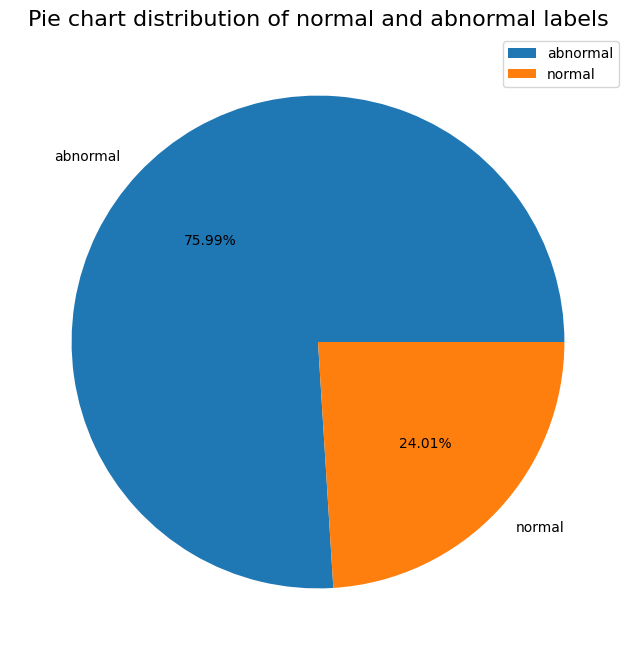

In [487]:
plt.figure(figsize=(8,8))
plt.pie(data.label.value_counts(),labels=['abnormal','normal'],autopct='%0.2f%%')
plt.title("Pie chart distribution of normal and abnormal labels",fontsize=16)
plt.legend()
plt.savefig('plots/Pie_chart_binary.png')
plt.show()

Multi class classification of the dataset

In [488]:
#counts the number of occurrences of each unique value in the column.
data['attack_cat'].value_counts()

,count
attack_cat,
Generic,39496
Normal,19488
Exploits,16187
DoS,1791
Fuzzers,1731
Reconnaissance,1703
Analysis,564
Worms,114
Backdoor,99


In [489]:
print(data['attack_cat'].value_counts())

attack_cat
Generic           39496
Normal            19488
Exploits          16187
DoS                1791
Fuzzers            1731
Reconnaissance     1703
Analysis            564
Worms               114
Backdoor             99
Name: count, dtype: int64


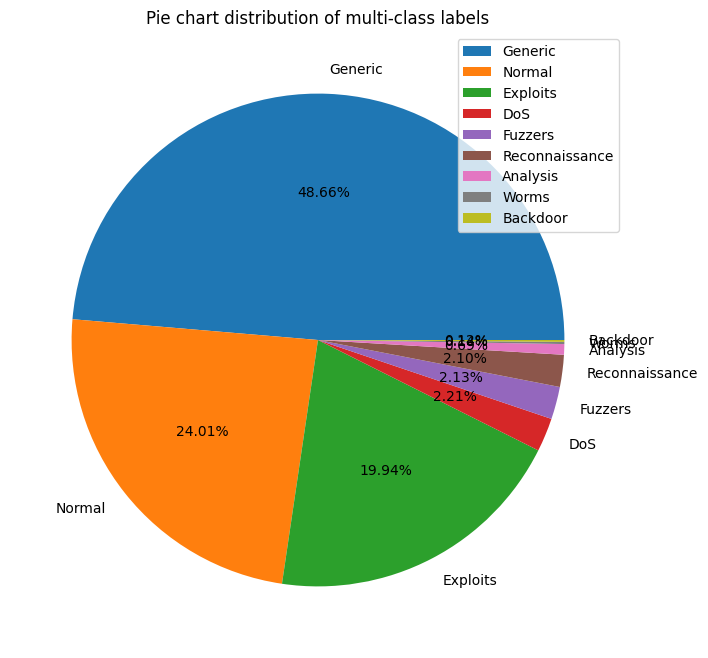

In [490]:
plt.figure(figsize=(8,8))
counts = data['attack_cat'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%0.2f%%')
#plt.pie(data['attack_cat'].value_counts(),labels=data.attack_cat.unique(),autopct='%0.2f%%')
plt.title('Pie chart distribution of multi-class labels')
plt.legend(loc='best')
plt.savefig('plots/Pie_chart_multi.png')
plt.show()

## One hot encoding is a technique that we use to represent categorical variables as numerical values in a machine learning model

In [491]:
num_col = data.select_dtypes(include='number').columns

# selecting categorical data attributes
cat_col = data.columns.difference(num_col)
cat_col = cat_col[1:]
cat_col

Index(['proto', 'service', 'state'], dtype='object')

In [492]:
# creating a dataframe with only categorical attributes
data_cat = data[cat_col].copy()
data_cat.head()

,proto,service,state
3,tcp,ftp,FIN
11,tcp,smtp,FIN
15,udp,snmp,INT
17,tcp,http,FIN
21,tcp,http,FIN


In [493]:
# one-hot-encoding categorical attributes using pandas.get_dummies() function
data_cat = pd.get_dummies(data_cat,columns=cat_col)

In [494]:
print(data_cat.dtypes)

proto_tcp           bool
proto_udp           bool
service_dhcp        bool
service_dns         bool
service_ftp         bool
service_ftp-data    bool
service_http        bool
service_irc         bool
service_pop3        bool
service_radius      bool
service_smtp        bool
service_snmp        bool
service_ssh         bool
service_ssl         bool
state_CON           bool
state_FIN           bool
state_INT           bool
state_REQ           bool
state_RST           bool
dtype: object


In [495]:
data_cat = data_cat.astype(int)

In [496]:
print(data_cat.dtypes)

proto_tcp           int64
proto_udp           int64
service_dhcp        int64
service_dns         int64
service_ftp         int64
service_ftp-data    int64
service_http        int64
service_irc         int64
service_pop3        int64
service_radius      int64
service_smtp        int64
service_snmp        int64
service_ssh         int64
service_ssl         int64
state_CON           int64
state_FIN           int64
state_INT           int64
state_REQ           int64
state_RST           int64
dtype: object


In [497]:
data_cat.head()

,proto_tcp,proto_udp,service_dhcp,service_dns,service_ftp,service_ftp-data,service_http,service_irc,service_pop3,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,state_CON,state_FIN,state_INT,state_REQ,state_RST
3,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
11,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
15,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
17,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
21,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [498]:
data_cat.shape

(81173, 19)

In [499]:
data.shape

(81173, 45)

In [500]:
#The DataFrame data will now include all original columns as well as the new one-hot encoded columns from data_cat.
#The columns from data_cat are appended to data, expanding the DataFrame horizontally.
data = pd.concat([data, data_cat],axis=1)

In [501]:
data.shape

(81173, 64)

In [502]:
#This line removes the original categorical columns from the data DataFrame after they have been replaced by their one-hot encoded versions.
data.drop(columns=cat_col,inplace=True)

In [503]:
data.shape

(81173, 61)

# Data Normalization

In [504]:
# selecting numeric attributes columns from data

#This code creates a list of numeric columns from the data DataFrame, excludes certain columns ('id' and 'label'), and then prints the resulting list of numeric features. The goal is to focus on numeric features that are used for analysis or modeling, excluding columns that are not useful for these purposes.
num_col = list(data.select_dtypes(include='number').columns)
num_col.remove('id')
num_col.remove('label')
print(num_col)

['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports', 'proto_tcp', 'proto_udp', 'service_dhcp', 'service_dns', 'service_ftp', 'service_ftp-data', 'service_http', 'service_irc', 'service_pop3', 'service_radius', 'service_smtp', 'service_snmp', 'service_ssh', 'service_ssl', 'state_CON', 'state_FIN', 'state_INT', 'state_REQ', 'state_RST']


In [505]:
#This function normalization normalizes specified numeric columns in the DataFrame df to a range between 0 and 1 using the MinMaxScaler. It iterates over the specified columns, applies the scaler, and updates the DataFrame in place. The function then returns the modified DataFrame with normalized columns.

# using minmax scaler for normalizing data
minmax_scale = MinMaxScaler(feature_range=(0, 1))
def normalization(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = minmax_scale.fit_transform(arr.reshape(len(arr),1))
  return df

In [506]:
# data before normalization
data.head()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,state_CON,state_FIN,state_INT,state_REQ,state_RST
3,4,1.681642,12,12,628,770,13.677108,62,252,2.740179e+03,...,0,0,0,0,0,0,1,0,0,0
11,12,2.093085,62,28,56329,2212,42.520967,62,252,2.118251e+05,...,0,1,0,0,0,0,1,0,0,0
15,16,0.000002,2,0,138,0,500000.001300,254,0,2.760000e+08,...,0,0,1,0,0,0,0,1,0,0
17,18,0.393556,10,8,860,1096,43.195886,62,252,1.573347e+04,...,0,0,0,0,0,0,1,0,0,0
21,22,0.338017,10,6,998,268,44.376468,254,252,2.127704e+04,...,0,0,0,0,0,0,1,0,0,0


In [507]:
# calling normalization() function
data = normalization(data.copy(),num_col)

In [508]:
# data after normalization
data.head()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,state_CON,state_FIN,state_INT,state_REQ,state_RST
3,4,2.802780e-02,0.001144,0.001093,0.000041,0.000053,0.000014,0.138393,0.992126,0.000001,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
11,12,3.488529e-02,0.006344,0.002551,0.004337,0.000151,0.000043,0.138393,0.992126,0.000092,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
15,16,1.666693e-08,0.000104,0.000000,0.000003,0.000000,0.500000,0.995536,0.000000,0.119792,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
17,18,6.559354e-03,0.000936,0.000729,0.000059,0.000075,0.000043,0.138393,0.992126,0.000007,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
21,22,5.633690e-03,0.000936,0.000547,0.000069,0.000018,0.000044,0.995536,0.992126,0.000009,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# Label Encoding

## Binary Labels

In [509]:
# changing attack labels into two categories 'normal' and 'abnormal'
bin_label = pd.DataFrame(data.label.map(lambda x:'normal' if x==0 else 'abnormal'))

In [510]:
# creating a dataframe with binary labels (normal,abnormal)
bin_data = data.copy()
bin_data['label'] = bin_label

In [511]:
# label encoding (0,1) binary labels
le1 = preprocessing.LabelEncoder()
enc_label = bin_label.apply(le1.fit_transform)
bin_data['label'] = enc_label

In [512]:
le1.classes_

array(['abnormal', 'normal'], dtype=object)

In [513]:
np.save("le1_classes.npy",le1.classes_,allow_pickle=True)

## Multi-class Labels

In [514]:
#These lines of code create a separate copy of the original DataFrame data named multi_data, and then create a new DataFrame multi_label that contains only the 'attack_cat' column from multi_data. This setup is useful for performing operations on the 'attack_cat' column without affecting the rest of the data or the original DataFrame.

# one-hot-encoding attack label
multi_data = data.copy()
multi_label = pd.DataFrame(multi_data.attack_cat)

In [515]:
#This line of code transforms the categorical 'attack_cat' column into several binary columns representing each category, making the data suitable for machine learning algorithms that require numerical input.

multi_data = pd.get_dummies(multi_data,columns=['attack_cat'])

In [516]:
#If the original 'attack_cat' column had categories like ['DoS', 'Probe', 'Normal'], LabelEncoder might map them to [0, 1, 2], respectively. After applying this encoding, the multi_data DataFrame will include a new column 'label' with these numerical values.

# label encoding (0,1,2,3,4,5,6,7,8) multi-class labels
le2 = preprocessing.LabelEncoder()
enc_label = multi_label.apply(le2.fit_transform)
multi_data['label'] = enc_label

In [531]:
multi_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81173 entries, 3 to 175340
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   dttl         81173 non-null  float64
 1   swin         81173 non-null  float64
 2   dwin         81173 non-null  float64
 3   tcprtt       81173 non-null  float64
 4   synack       81173 non-null  float64
 5   ackdat       81173 non-null  float64
 6   label        81173 non-null  int64  
 7   proto_tcp    81173 non-null  float64
 8   proto_udp    81173 non-null  float64
 9   service_dns  81173 non-null  float64
 10  state_CON    81173 non-null  float64
 11  state_FIN    81173 non-null  float64
dtypes: float64(11), int64(1)
memory usage: 8.1 MB


In [517]:
le2.classes_

array(['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic',
       'Normal', 'Reconnaissance', 'Worms'], dtype=object)

In [518]:
#This line of code saves the unique class labels (le2.classes_) used by the LabelEncoder to a file named "le2_classes.npy". This can be useful for later reference or to reload the class labels if you need to reverse the encoding or use the same label mapping in another environment.

np.save("le2_classes.npy",le2.classes_,allow_pickle=True)

#Correlation between features of dataset

In [519]:
num_col.append('label')

## Correlation Matrix for Binary Labels

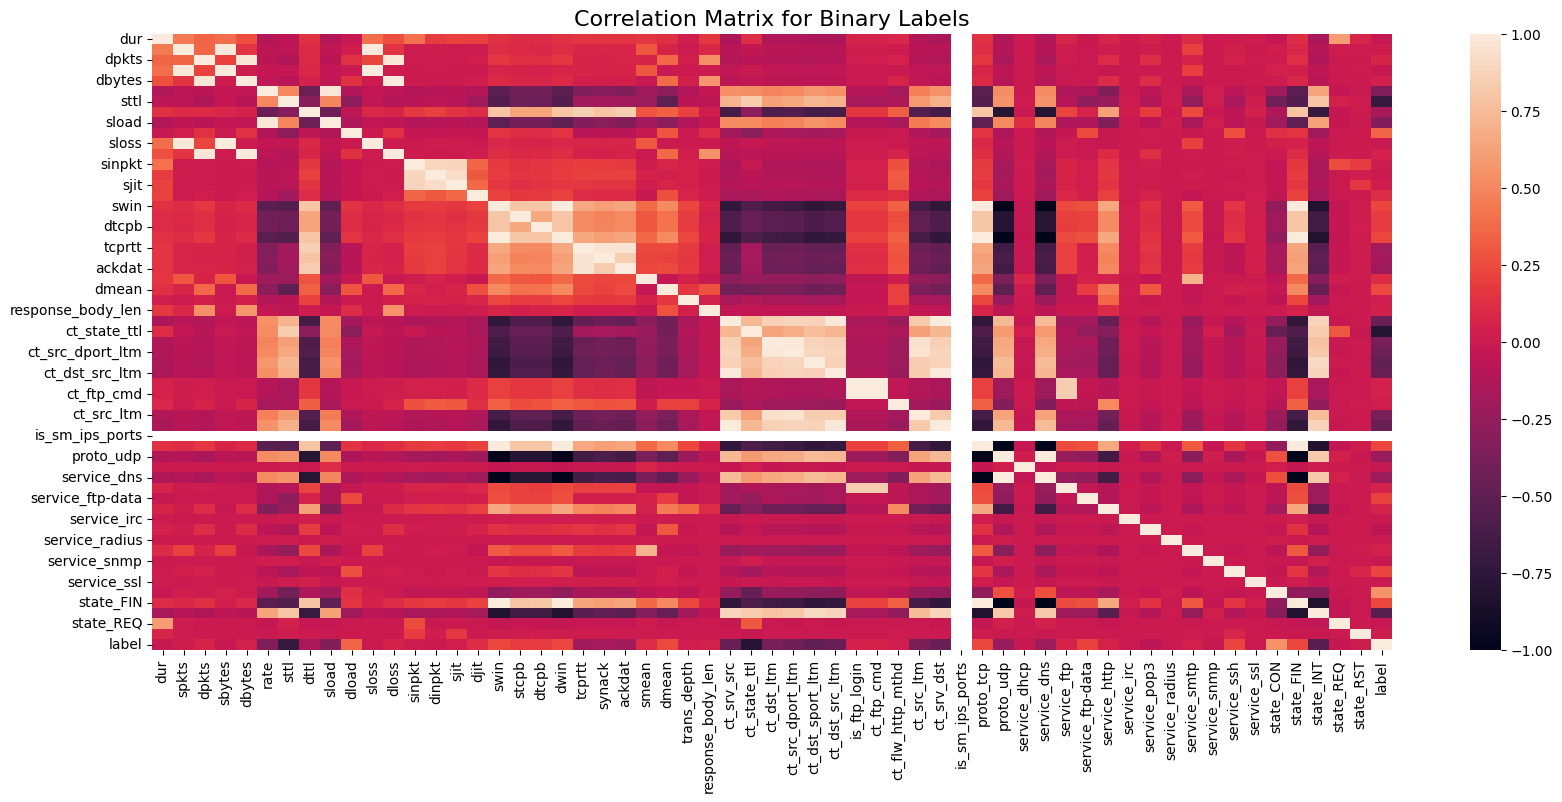

In [520]:
# Correlation Matrix for Binary Labels
plt.figure(figsize=(20,8))
corr_bin = bin_data[num_col].corr()
sns.heatmap(corr_bin,vmax=1.0,annot=False)
plt.title('Correlation Matrix for Binary Labels',fontsize=16)
plt.savefig('plots/correlation_matrix_bin.png')
plt.show()

## Correlation Matrix for Multi-class Labels

In [521]:
num_col = list(multi_data.select_dtypes(include='number').columns)

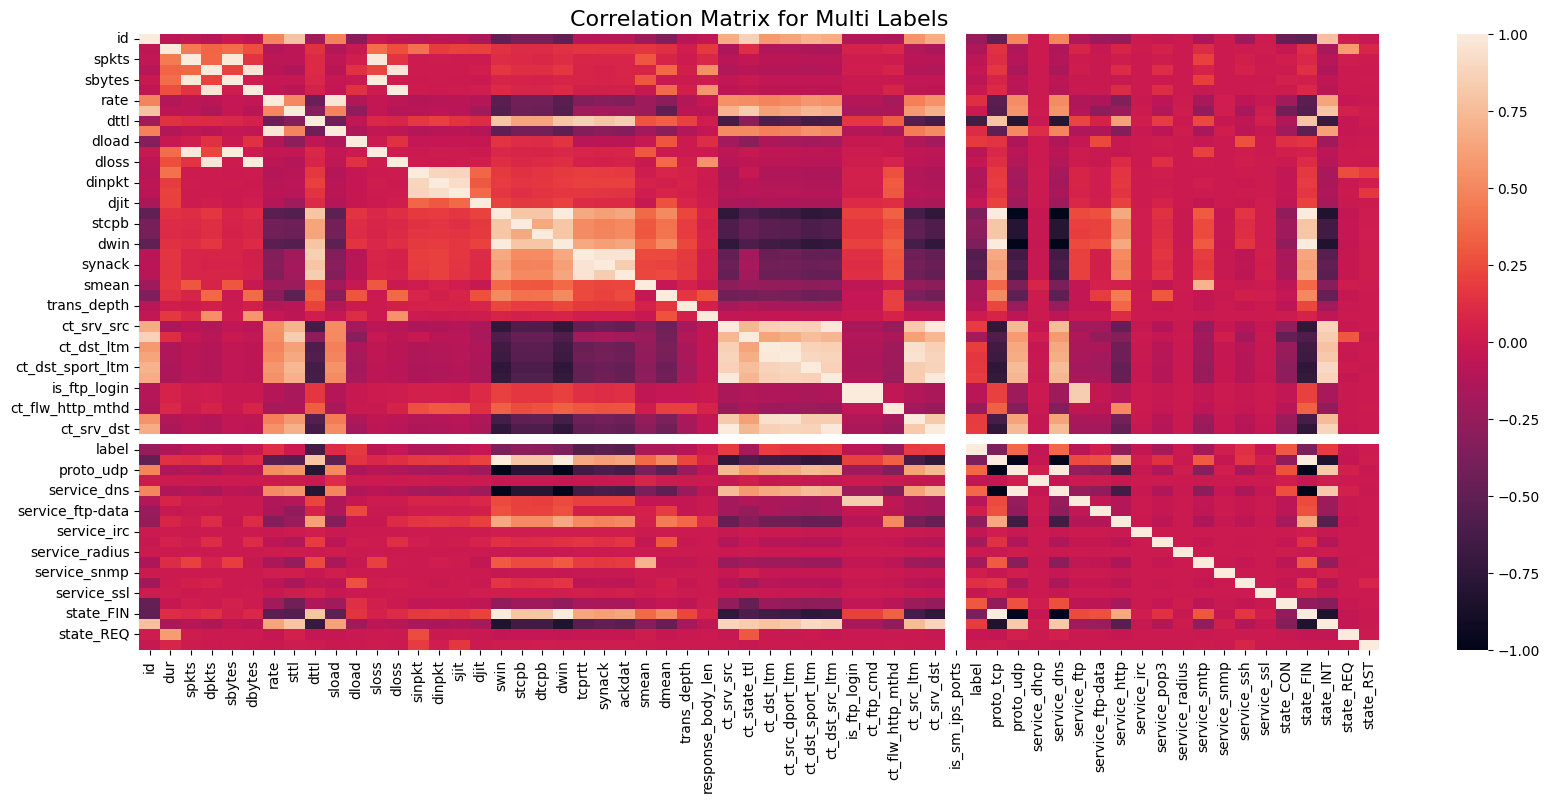

In [522]:
# Correlation Matrix for Multi-class Labels
plt.figure(figsize=(20,8))
corr_multi = multi_data[num_col].corr()
sns.heatmap(corr_multi,vmax=1.0,annot=False)
plt.title('Correlation Matrix for Multi Labels',fontsize=16)
plt.savefig('plots/correlation_matrix_multi.png')
plt.show()

# Feature Selection

## Multi-class Labels

In [523]:
#This code identifies and lists the numeric attributes in the multi_data DataFrame that have a strong correlation (greater than 0.3) with the encoded 'label' attribute. The correlation values are considered in absolute terms, so both positive and negative correlations above the threshold are included. The results are sorted in ascending order to show the attributes with the lowest significant correlations first.

# finding the attributes which have more than 0.3 correlation with encoded attack label attribute
corr_ymulti = abs(corr_multi['label'])
highest_corr_multi = corr_ymulti[corr_ymulti >0.3]
highest_corr_multi.sort_values(ascending=True)


,label
state_CON,0.302853
state_FIN,0.361750
proto_udp,0.364393
swin,0.364393
dwin,0.364393
proto_tcp,0.364393
service_dns,0.365346
synack,0.524027
ackdat,0.570098
tcprtt,0.570205


In [524]:
# selecting attributes found by using pearson correlation coefficient
multi_cols = highest_corr_multi.index
multi_cols

Index(['dttl', 'swin', 'dwin', 'tcprtt', 'synack', 'ackdat', 'label',
       'proto_tcp', 'proto_udp', 'service_dns', 'state_CON', 'state_FIN'],
      dtype='object')

In [525]:
# Multi-class labelled Dataset
multi_data = multi_data[multi_cols].copy()

In [526]:
multi_data.to_csv('./datasets/multi_data.csv')

# Random Forest Classifier

## Binary Classification

In [527]:
X = bin_data.drop(columns=['label'],axis=1)
Y = bin_data['label']

In [528]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.20, random_state=50)

In [ ]:
print(X_train.dtypes)

In [532]:
# Drop the 'attack_cat' column from X_train
#X_train = X_train.drop(columns=['attack_cat'])

# Optionally, do the same for X_test if it contains the same column
#X_test = X_test.drop(columns=['attack_cat'])

In [ ]:
print(X_train.dtypes)

In [534]:
rf_bin = RandomForestClassifier(random_state=123)
rf_bin.fit(X_train,y_train)

RandomForestClassifier(random_state=123)

In [535]:
y_pred = rf_bin.predict(X_test)

In [536]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error -  0.00351093316907915
Mean Squared Error -  0.00351093316907915
Root Mean Squared Error -  0.059253127926541985
R2 Score -  98.08254618798667
Accuracy -  99.6489066830921


In [537]:
cls_report= classification_report(y_true=y_test, y_pred=y_pred,target_names=le1.classes_)
print(cls_report)

              precision    recall  f1-score   support

    abnormal       1.00      1.00      1.00     12326
      normal       1.00      0.99      0.99      3909

    accuracy                           1.00     16235
   macro avg       1.00      0.99      1.00     16235
weighted avg       1.00      1.00      1.00     16235



In [538]:
rf_bin_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
rf_bin_df.to_csv('./predictions/rf_real_pred_bin.csv')
rf_bin_df

,Actual,Predicted
159889,0,0
125506,0,0
158979,0,0
8148,1,1
39918,1,1
...,...,...
68470,0,0
159674,0,0
171321,0,0
125777,0,0


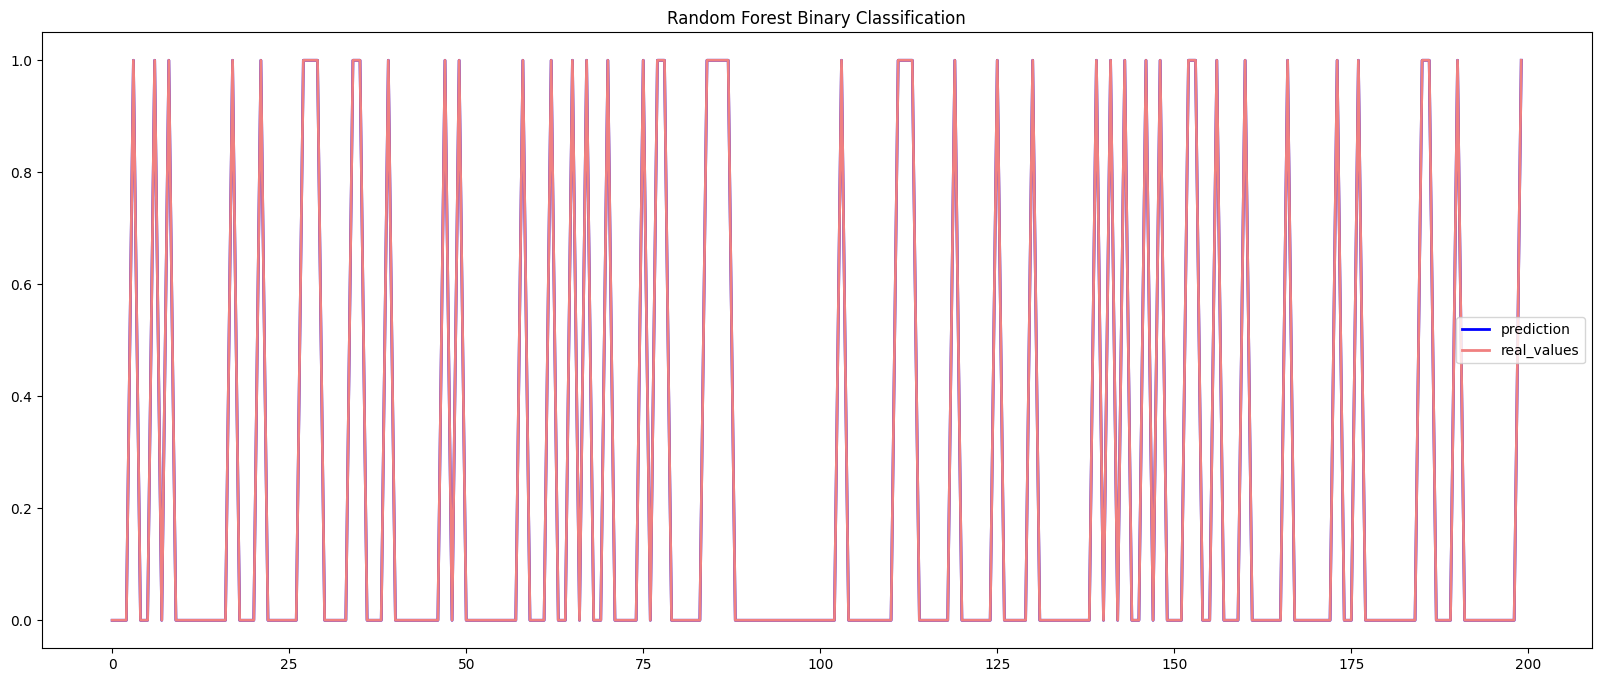

In [539]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[200:400], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[200:400].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.title("Random Forest Binary Classification")
plt.savefig('plots/rf_real_pred_bin.png')
plt.show()

## Multi Class Classification

In [541]:
X = multi_data.drop(columns=['label'],axis=1)
Y = multi_data['label']

In [542]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.30, random_state=100)

In [543]:
rf_multi = RandomForestClassifier(random_state=50)
rf_multi.fit(X_train,y_train)

RandomForestClassifier(random_state=50)

In [544]:
y_pred = rf_multi.predict(X_test)

In [545]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error -  0.2570630749014455
Mean Squared Error -  0.7936103810775296
Root Mean Squared Error -  0.8908481245855152
R2 Score -  47.05095928184462
Accuracy -  89.08508541392905


In [546]:
print(classification_report(y_test, y_pred,target_names=le2.classes_))

                precision    recall  f1-score   support

      Analysis       0.65      0.43      0.52       166
      Backdoor       0.11      0.03      0.05        32
           DoS       0.12      0.04      0.06       521
      Exploits       0.70      0.91      0.79      4900
       Fuzzers       0.20      0.07      0.10       508
       Generic       0.99      0.99      0.99     11839
        Normal       0.97      0.92      0.94      5855
Reconnaissance       0.20      0.07      0.10       502
         Worms       0.06      0.03      0.04        29

      accuracy                           0.89     24352
     macro avg       0.45      0.39      0.40     24352
  weighted avg       0.87      0.89      0.88     24352



In [547]:
rf_multi_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
rf_multi_df.to_csv('./predictions/rf_real_pred_multi.csv')
rf_multi_df

,Actual,Predicted
22650,6,6
27815,6,6
49033,3,3
156811,5,5
136878,5,5
...,...,...
94950,4,5
148684,5,5
12788,6,6
81439,3,3


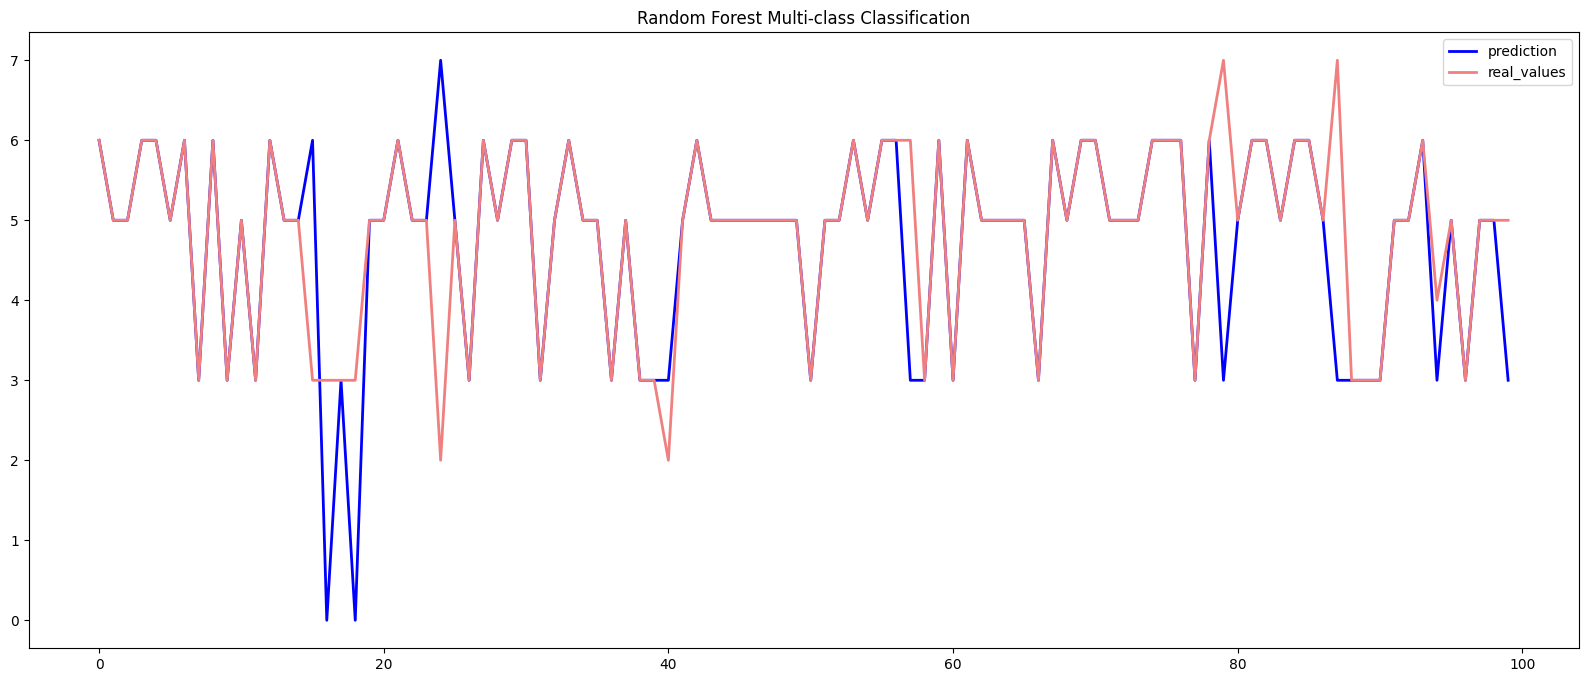

In [548]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[500:600], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[500:600].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.title("Random Forest Multi-class Classification")
plt.savefig('plots/rf_real_pred_multi.png')
plt.show()

In [549]:
pkl_filename = "./models/random_forest_multi.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk
  with open(pkl_filename, 'wb') as file:
    pickle.dump(rf_multi, file)
  print("Saved model to disk")
else:
  print("Model already saved")

Saved model to disk
